In [3]:
# #******************* DOWNLOADING ALL THE LIBRARIES AND PACKAGES **************************
%env OMP_NUM_THREADS=2
import warnings
warnings.filterwarnings('ignore')
# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from scipy.special import comb
import math
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import io
from google.colab import files


env: OMP_NUM_THREADS=2


** Question: 1 **
Downloading all the relevant files (long process)

In [ ]:
#****************** UPLOADING RELEVANT FILES *****************


In [2]:
# monday
uploaded_1 = files.upload()


Saving Monday-WorkingHours.pcap_ISCX.csv to Monday-WorkingHours.pcap_ISCX.csv


In [22]:
df1 = pd.read_csv(io.BytesIO(uploaded_1['Monday-WorkingHours.pcap_ISCX.csv']))

In [3]:
# tuesday
uploaded_2 = files.upload()

Saving Tuesday-WorkingHours.pcap_ISCX.csv to Tuesday-WorkingHours.pcap_ISCX.csv


In [24]:
df2 = pd.read_csv(io.BytesIO(uploaded_2['Tuesday-WorkingHours.pcap_ISCX.csv']))

In [4]:
# wednesday
uploaded_3 = files.upload()

Saving Wednesday-workingHours.pcap_ISCX.csv to Wednesday-workingHours.pcap_ISCX.csv


In [5]:
df3 = pd.read_csv(io.BytesIO(uploaded_3['Wednesday-workingHours.pcap_ISCX.csv']))

In [5]:
# thursday morning # codec problem
uploaded_4 = files.upload()

Saving Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv to Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


In [ ]:
df4 = pd.read_csv(io.BytesIO(uploaded_4['Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv']))

In [6]:
# thursday afternoon
uploaded_5 = files.upload()

Saving Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv to Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


In [32]:
df5 = pd.read_csv(io.BytesIO(uploaded_5['Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv']))

In [7]:
# friday morning
uploaded_6 = files.upload()

Saving Friday-WorkingHours-Morning.pcap_ISCX.csv to Friday-WorkingHours-Morning.pcap_ISCX.csv


In [39]:
#df6 = pd.read_csv(io.BytesIO(uploaded_6['Friday-WorkingHours-Morning.pcap_ISCX.csv']))

In [9]:
# friday afternoon-1
uploaded_7 = files.upload()

Saving Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv to Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX (1).csv


In [35]:
df7 = pd.read_csv(io.BytesIO(uploaded_7['Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv']))

In [10]:
# friday afternoon-2
uploaded_8 = files.upload()

Saving Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv to Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [36]:
df8 = pd.read_csv(io.BytesIO(uploaded_8['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv']))

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


** Question: 2 **

Picking dataset from wednesday because it has multiple label classes

In [6]:
df3 = pd.read_csv(io.BytesIO(uploaded_3['Wednesday-workingHours.pcap_ISCX.csv']))
df3[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [ ]:
# ***************** Analysing Basic Properties of Data ***********************

print(f'shape of orginal data set is {df3.shape}')

# data types
obj_cols = list(df3.select_dtypes(include='object'))
print(f'Columns that objects are: {obj_cols}')

int_cols = list(df3.select_dtypes(include='int'))
print(f'Columns with data type integers are: {int_cols}')

float_cols = list(df3.select_dtypes(include='float'))
print(f'Columns with data type float are: {float_cols}')

# null values
null_col = df3.columns[df3.isnull().any()]
print(f'Columns with null values are: {null_col}')

# duplicated values
df3["is_duplicate"]= df3.duplicated()
print(f"Total number of duplicated data points are: {len(df3[df3['is_duplicate']==True])}")

# Nan values i,e missing values
na_col = df3.columns[df3.isna().any()]
print(f'Columns with NaN values are: {na_col}')


shape of orginal data set is (692703, 85)
Columns that objects are: ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', ' Label']
Columns with data type integers are: [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', 'Bwd Packet Length Max', ' Bwd Packet Length Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', ' Min Packet Length', ' Max Packet Length', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd B

* Question: 3 **

ML methodology of choice is supervised learning because of presence of labels.

Supervised learning also gives various options of algorithms that can be applied. Each supervised learning algorithm has its own pros and cons so it is a good idea to choose supervised learning so that then depending on data, one can choose the best model. Data may differ in number of features, noise etc so depending on nature of data, one can choose suitable supervised learning algorithm.

** Question: 4 **

Processing the class features as Binary Classes

In [ ]:
# Assigning 0 to beningn and 1 to other labels
# Processing the labels

df3_exp = df3.copy()
replacements = {' Label': {'BENIGN': 0, 'DoS slowloris': 1, 'DoS Slowhttptest': 1, 'DoS Hulk': 1, 'DoS GoldenEye': 1, 'Heartbleed': 1}}
df3_exp.replace(replacements, regex=True, inplace=True)
df3_exp[' Label'].unique()

# checking balance
num_attacks = len(df3_exp.loc[df3_exp[' Label'] == 1])
num_benign = len(df3_exp.loc[df3_exp[' Label'] == 0])
total = num_attacks + num_benign

print(f'The number of benign labels is {num_benign}')
print(f'The number of attack labels is {num_attacks}')
print(f'The labels have been changed')

The number of benign labels is 440031
The number of attack labels is 252672
The labels have been changed


** Question: 5  &  6 **

Exploration of the chosen dataset

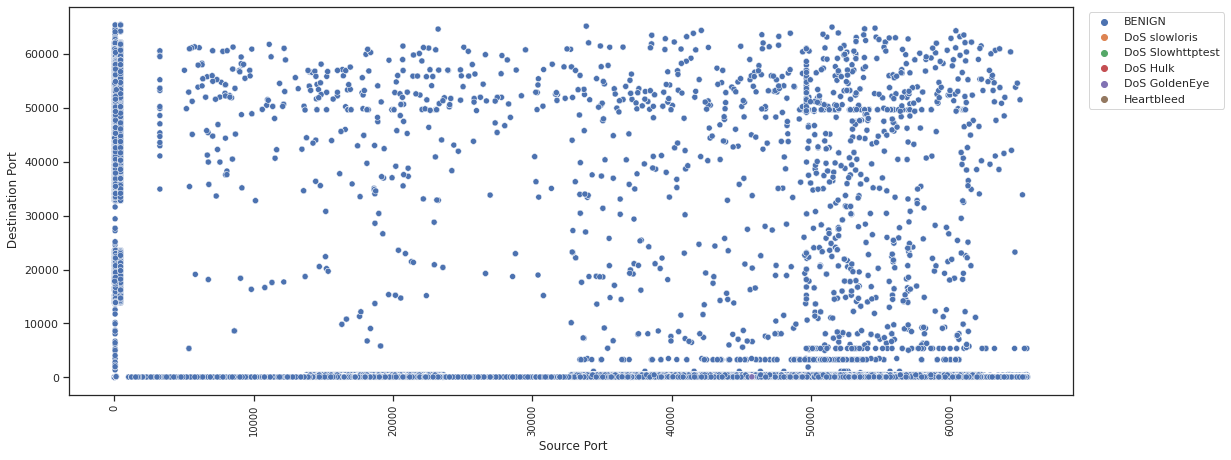

In [ ]:
plt.figure(figsize=(18, 7), dpi=72)
sns.scatterplot(x=' Source Port', y=' Destination Port', hue=' Label', data=df3)
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.01, 1.0));

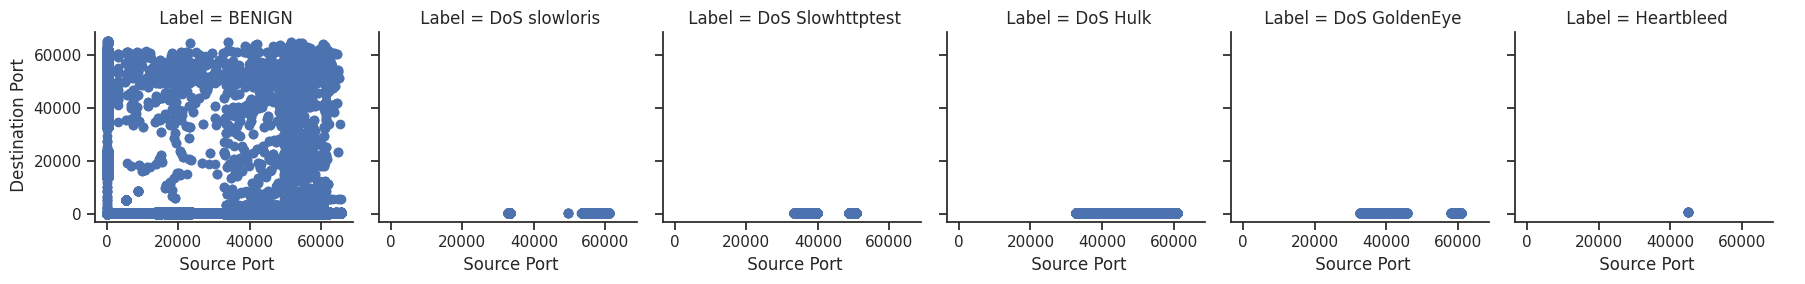

In [ ]:
# Plot for data exploration
g = sns.FacetGrid(df3, col=' Label')
g.map(plt.scatter, ' Source Port', ' Destination Port')
g.add_legend();

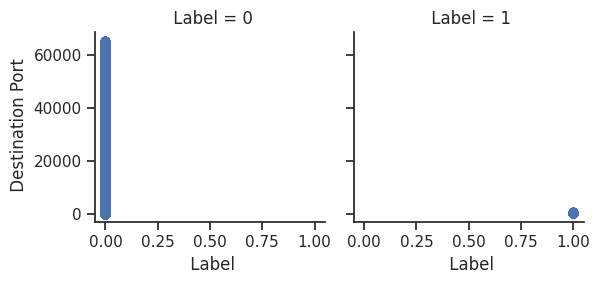

In [ ]:
# Plot for data exploration
g = sns.FacetGrid(df3_exp, col=' Label')
g.map(plt.scatter, ' Label', ' Destination Port')
g.add_legend();

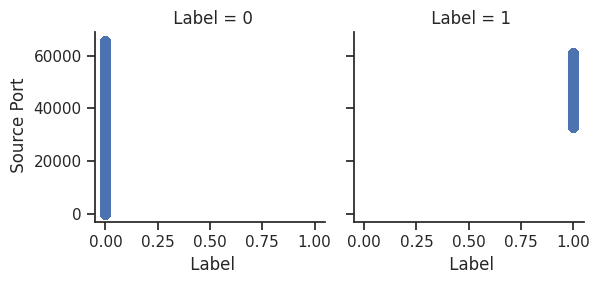

In [ ]:
# Plot for data exploration
g = sns.FacetGrid(df3_exp, col=' Label')
g.map(plt.scatter, ' Label', ' Source Port')
g.add_legend();

In [ ]:
# ********** Finding important networking port numbers *****************

# Port numbers (source and destination) that are not labelled benign
# Selecting Source Ports (origin of attack) that have Label:1

# step:1 selecting df a with label-1
df_attacks = df3_exp.loc[df3_exp[' Label'] == 1]

# Now, selecting source port column elements from df_attack
imp_sourceports = df_attacks[' Source Port']


print(len(imp_sourceports))
len(df_attacks[' Source Port'].unique())
freq_sources = df_attacks[' Source Port'].value_counts()
print(freq_sources)


#Choosing top 5 source ports , USE a better way of selecting
imp_sources = [54350, 54378, 54454, 54100, 54424]
sources_list = list(df3[' Source Port'])
print(len(sources_list))
notimp_list = [ elem for elem in sources_list if elem not in imp_sources]
print(len(notimp_list))


252672
54350    30
54378    29
54454    29
54100    29
54424    28
         ..
39758     3
39760     3
49633     2
49631     2
39780     1
Name:  Source Port, Length: 14118, dtype: int64
692703
692478


In [ ]:
# One hot encoding for top 5 source ports
# Replacing all rows under sources port column, that have one of the 5 imp ports, to 'I'
# And rest to 'NI'. Then, hot encoding

# Assigning 0 to beningn and 1 to other labels
# Processing the labels


replacements = {' Source Port': {54350: 'I', 54378: 'I', 54454: 'I', 54100: 'I', 54424: 'I'}}
df3_exp.replace(replacements, regex=True, inplace=True)
df3_exp.loc[df3_exp[' Source Port'] != 'I', ' Source Port'] = 'NI'



In [ ]:
df3_copy = df3_exp.copy()
df_hot = pd.get_dummies(df3_copy[[' Source Port']])

In [ ]:
# deleted columns that were hot-enocded from df2 so that df2 and df3 could be concatenated
df3_copy.drop([' Source Port'], axis=1, inplace=True)

In [ ]:
# FINAL DATAFRAME TO BE USED

# concatenate df2 and df3
df = pd.concat([df3_copy, df_hot], axis=1)
df.head()

,Flow ID,Source IP,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,is_duplicate,Source Port_I,Source Port_NI
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0,False,0,1
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,172,...,0.0,0.0,0.0,0.0,0.0,0.0,0,False,0,1
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,3150,...,0.0,0.0,0.0,0.0,0.0,0.0,0,False,0,1
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,3452,...,0.0,0.0,0.0,0.0,0.0,0.0,0,False,0,1
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,3150,...,0.0,0.0,0.0,0.0,0.0,0.0,0,False,0,1


** Question: 6 **
Plots for dataset features

<Axes: xlabel=' Flow Duration', ylabel=' Source Port'>

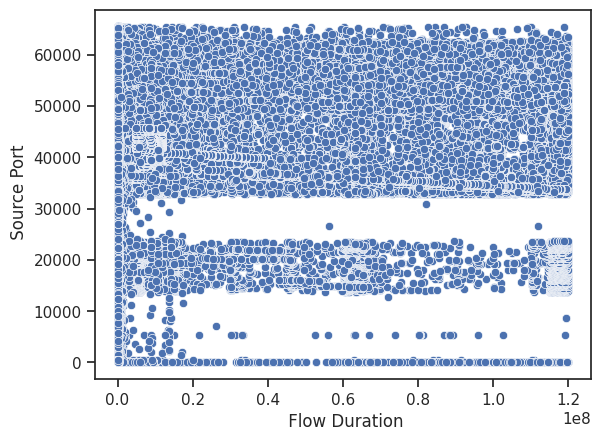

In [7]:
sns.scatterplot(data=df3, x=' Flow Duration', y=" Source Port")


<Axes: xlabel='Total Length of Fwd Packets', ylabel=' Source Port'>

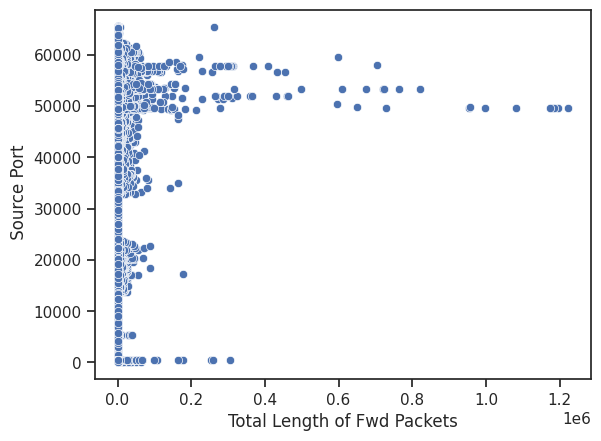

In [8]:
sns.scatterplot(data=df3, x='Total Length of Fwd Packets', y=" Source Port")


<Axes: xlabel=' Total Length of Bwd Packets', ylabel=' Source Port'>

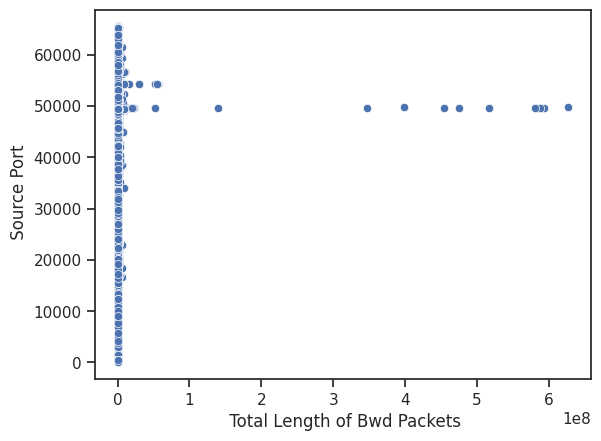

In [9]:
sns.scatterplot(data=df3, x=' Total Length of Bwd Packets', y=" Source Port")



<Axes: xlabel=' Fwd Packet Length Max', ylabel=' Source Port'>

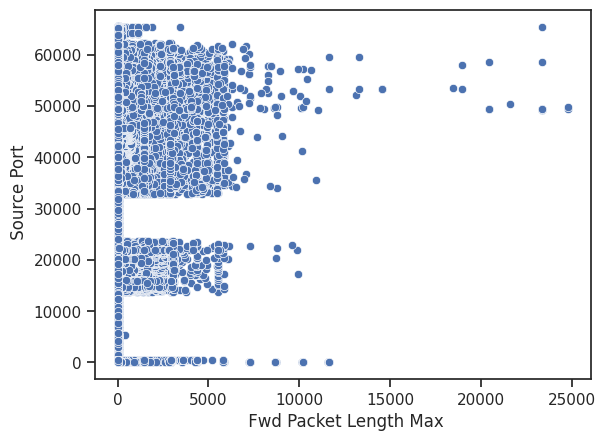

In [10]:
sns.scatterplot(data=df3, x=' Fwd Packet Length Max', y=" Source Port")


<Axes: xlabel=' Fwd Packet Length Min', ylabel=' Source Port'>

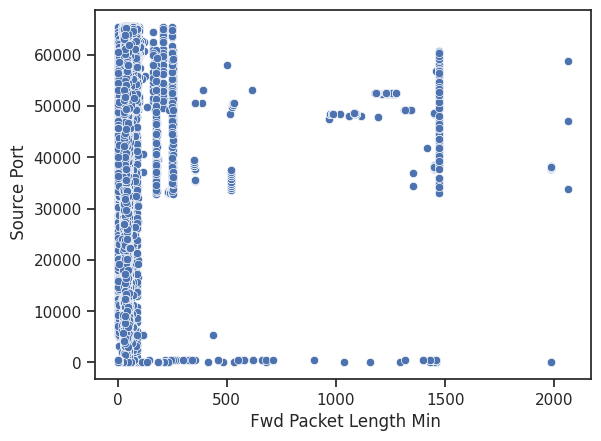

In [11]:
sns.scatterplot(data=df3, x=' Fwd Packet Length Min', y=" Source Port")


<Axes: xlabel=' Bwd Packet Length Mean', ylabel=' Source Port'>

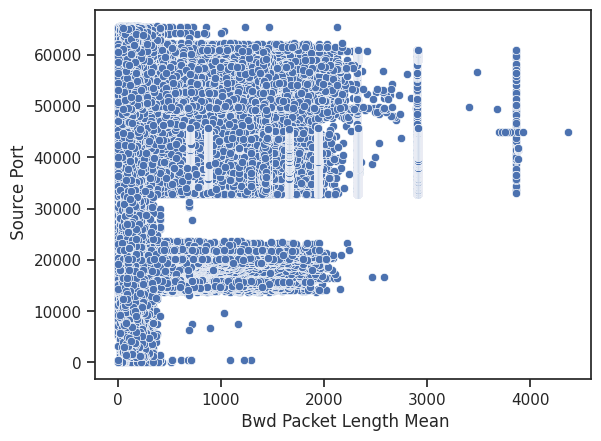

In [12]:
sns.scatterplot(data=df3, x=' Bwd Packet Length Mean', y=" Source Port")


<Axes: xlabel=' Packet Length Mean', ylabel='Count'>

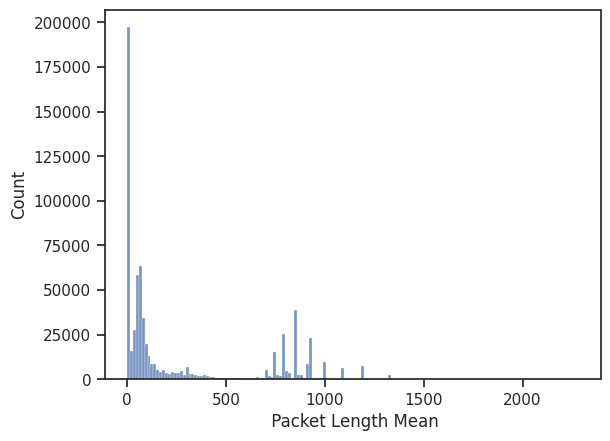

In [ ]:
sns.histplot(data=df, x=' Packet Length Mean')

<Axes: xlabel=' Flow Duration', ylabel='Count'>

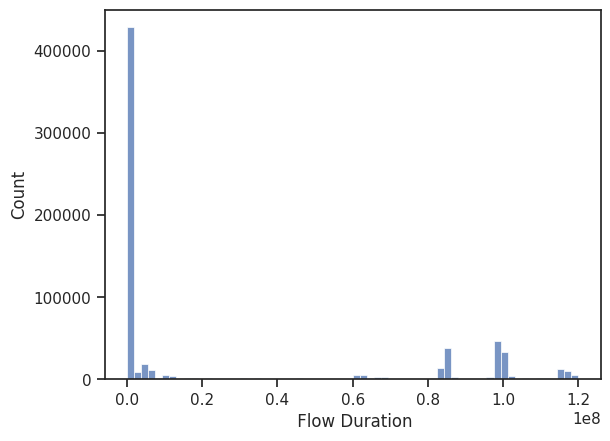

In [ ]:
sns.histplot(data=df, x=' Flow Duration')

In [ ]:
# Preprocessing the data

# deleting problematic columns
del df['Flow ID']

In [ ]:
del df[' Source IP']

In [ ]:
del df[' Destination IP']

In [ ]:
del df[' Timestamp']

In [ ]:
df.columns[df.isnull().any()]

Index(['Flow Bytes/s'], dtype='object')

In [ ]:
del df['Flow Bytes/s']

In [ ]:
# drdropping inf values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

** Question: 7 **

Classifier Models and their 10-fold CV performance

In [ ]:
# setting up x & y for modeling

dfX = df.loc[:, df.columns != ' Label']
dfy = df.loc[:, df.columns == ' Label'].values.ravel()

# Sanity check
print(f'N={len(dfX)}, M={len(dfX.columns)}')


# Set our main data structures X and y
X = dfX.values
y = dfy

N=691406, M=81


In [2]:
# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
acc = eval_classifier(GaussianNB(),X, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')


Naive Bayes CV accuracy=0.82 ±0.101


In [ ]:
# Linear SVC
from sklearn.svm import SVC
acc = eval_classifier(SVC(tol=10, kernel = 'linear', probability = True),                      X, y)
print(f'Linear SVC CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Linear SVC CV accuracy=0.36 ±0.000


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
acc = eval_classifier(DecisionTreeClassifier(), X, y)
print(f'Decision Tree accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Decision Tree accuracy=0.98 ±0.037


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
acc = eval_classifier(RandomForestClassifier(), X, y)
print(f'Random Forest accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')


Random Forest accuracy=0.98 ±0.047


** Question 8 & 9 **


Converting code to be run on all 7 datasets &
Reporting performance of Random Forrest on all 8 datasets

In [3]:
# CODE for processing multiple datasets
import os
import pandas as pd
import glob

def myfunction(data):
  print(data)

dir = 'sample_data'

for file in os.listdir(dir):
  if file.endswith(".csv"):
    myfunction(file)
    
all_files = glob.glob(dir + "/*.csv")
dataframes = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dataframes.append(df)


Tuesday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv


In [4]:
# looping over all dataframes to check for presence of number of labels
# this will help decide applicaiton of supervised or unsupervised learning

sl_df = []
usl_df = []

for df in dataframes:
  if len(df[' Label'].unique()) > 1:
    sl_df.append(df)
  else:
    usl_df.append(df)

print(len(sl_df))
print(len(usl_df))


6
1


In [5]:
# Processing dataframes in supervised learning algorithms
# Decision Tree

for df in sl_df:

  del df['Flow ID']
  del df[' Source IP']
  del df[' Destination IP']
  del df[' Timestamp']
  del df['Flow Bytes/s']
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df.dropna(inplace=True)

  dfX = df.loc[:, df.columns != ' Label']
  dfy = df.loc[:, df.columns == ' Label'].values.ravel()

  # Set our main data structures X and y
  X = dfX.values
  y = dfy

  acc = eval_classifier(DecisionTreeClassifier(), X, y)
  print(f'Decision Tree accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')



Decision Tree accuracy=1.00 ±0.000
Decision Tree accuracy=1.00 ±0.000
Decision Tree accuracy=1.00 ±0.006
Decision Tree accuracy=1.00 ±0.004
Decision Tree accuracy=1.00 ±0.000
Decision Tree accuracy=1.00 ±0.002


In [8]:
# Processing dataframes in supervised learning algorithms
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

for df in sl_df:


  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df.dropna(inplace=True)

  dfX = df.loc[:, df.columns != ' Label']
  dfy = df.loc[:, df.columns == ' Label'].values.ravel()

  # Set our main data structures X and y
  X = dfX.values
  y = dfy

  acc = eval_classifier(GaussianNB(),X, y)
  print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Naive Bayes CV accuracy=0.54 ±0.142
Naive Bayes CV accuracy=0.68 ±0.011
Naive Bayes CV accuracy=0.50 ±0.021
Naive Bayes CV accuracy=0.81 ±0.076
Naive Bayes CV accuracy=0.97 ±0.008
Naive Bayes CV accuracy=0.35 ±0.033


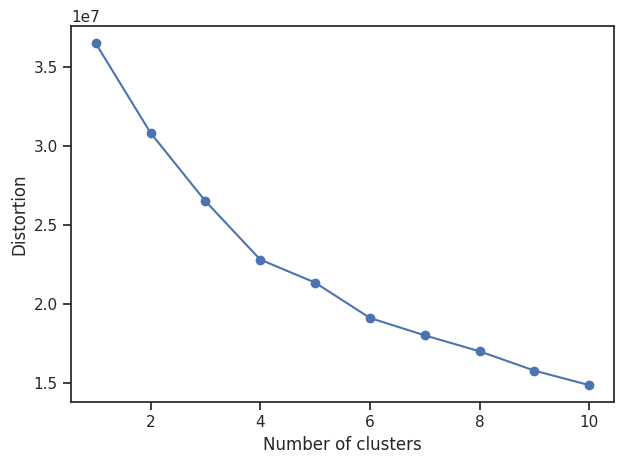

In [ ]:
# Unsupervised Learning for unlabelled data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

for df in usl_df:

  del df['Flow ID']
  del df[' Source IP']
  del df[' Destination IP']
  del df[' Timestamp']
  del df['Flow Bytes/s']
  
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df.dropna(inplace=True)

  dfX = df.loc[:, df.columns != ' Label']
  dfy = df.loc[:, df.columns == ' Label'].values.ravel()

  # Set our main data structures X and y
  X = dfX.values
  y = dfy


  scaler = StandardScaler()
  scaled_X = scaler.fit_transform(X)
  
  distortions = []
  for i in range(1, 11):
      km = KMeans(n_clusters=i, 
                  init='k-means++', 
                  n_init=10, 
                  max_iter=300, 
                  random_state=0)
      km.fit(scaled_X)
      distortions.append(km.inertia_)
  plt.plot(range(1, 11), distortions, marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Distortion')
  plt.tight_layout()
  #plt.savefig('images/11_03.png', dpi=300)
  plt.show()




acc = eval_classifier(DecisionTreeClassifier(), X, y)
print(f'Decision Tree accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')



** Question: 10 **

The first point that comes with lack of domain expertise is justification of clusters and number of clusters when processing unlabelled data. Yes, one can use clustering algorithms but I couldnt make sense of clustered data i.e what labels to use. Hence, working with a domain expert is super important.

The second point on this theme is that I did not know which features were supposed to be important. I used the hints given in the questions to figure out. Also, based on the hints, guessed that attacks may be coming from a certain set of locations so tracking them would be important.

Then, there was a file that was showing some codec error which I couldnt figure out why it was doing so. I had to ignore that file and continue ahead. I think, processing and addressing nature of given data files is a good skill to have.

Finally, about the things I did ok but took time. First of all, these files were too large. It was taking too much time to upload them on colab. Also, if colab disconnects for some reason, files have to be uploaded again. I wasted lots of time. But figured out that one can upload the files on google drive and then read the files from there. It takes less time !

Also, Colab was crashing all the time because it was using a lot of RAM. I think when files are heavy, I will switch to my local Pycharm to avoid wasting time. 

Then, there were few columns (like Flow) whose data type was object but each data point was long number with characters in it. I couldnt fully process it or change the data type so I did not use them in my modeling. For similar reasons, I ignored date, soure IP and destination IP.

Finally, I did not spend time on optimizing models. Mainly, because decision tree model gave me 98% accuracy. I guess for a proper model development, one should spend time on fine tuning. 
